# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations (lats go 90 to -90 and lngs go 180 to -180)
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [4]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city) 

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
lat = []
lng = []
temp = []
max_temp = []
humidity = []
clouds = []
wind = []
country = []
date = []

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
for city in cities:
    
    query = query_url + city
    
    #Try to grab the city
    try:
        response = requests.get(query).json()         
        print(f'Processing Record | {city}')    
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
    
    except:
        print(f'City not found. Skipping...')
        pass
    
    time.sleep(1)
    
print("all done")

Processing Record | upernavik
Processing Record | qaanaaq
Processing Record | ostrovnoy
Processing Record | ribeira grande
Processing Record | atuona
Processing Record | bluff
Processing Record | zhongshu
Processing Record | rikitea
Processing Record | vaini
Processing Record | yabucoa
Processing Record | daru
Processing Record | puerto ayora
Processing Record | vao
Processing Record | avarua
Processing Record | busselton
Processing Record | maple creek
Processing Record | bredasdorp
Processing Record | evensk
Processing Record | deputatskiy
Processing Record | koslan
Processing Record | jamestown
Processing Record | nikolskoye
Processing Record | oberkirch
Processing Record | rognan
Processing Record | cayenne
Processing Record | buarcos
Processing Record | hermanus
Processing Record | tuktoyaktuk
Processing Record | plettenberg bay
Processing Record | punta arenas
Processing Record | san francisco
Processing Record | luanda
Processing Record | lavrentiya
Processing Record | shizukuis

Processing Record | barao de melgaco
Processing Record | kadykchan
City not found. Skipping...
Processing Record | yar-sale
Processing Record | severo-kurilsk
Processing Record | port macquarie
Processing Record | medveda
Processing Record | alofi
Processing Record | mount gambier
Processing Record | cobija
Processing Record | bambous virieux
Processing Record | kyra
Processing Record | reconquista
Processing Record | kitui
Processing Record | devin
Processing Record | mountain home
Processing Record | kavieng
Processing Record | ondjiva
Processing Record | mapiri
Processing Record | laje
Processing Record | fairlie
Processing Record | shakawe
Processing Record | berdigestyakh
Processing Record | kaoma
Processing Record | nyuksenitsa
Processing Record | sao filipe
Processing Record | chunskiy
Processing Record | lata
Processing Record | lebu
Processing Record | salaberry-de-valleyfield
Processing Record | nola
Processing Record | husavik
Processing Record | veselynove
Processing Record

Processing Record | dauriya
Processing Record | anloga
Processing Record | wapakoneta
Processing Record | sedhiou
Processing Record | bhandara
Processing Record | paysandu
Processing Record | blonay
Processing Record | ambon
Processing Record | abu samrah
Processing Record | pecanha
Processing Record | kamenetskiy
Processing Record | akdepe
Processing Record | talcahuano
Processing Record | goderich
Processing Record | kahramanmaras
Processing Record | margate
Processing Record | batemans bay
Processing Record | kurilsk
Processing Record | dandong
Processing Record | vaitape
Processing Record | diffa
Processing Record | talara
Processing Record | dunhua
Processing Record | kasungu
Processing Record | plastun
Processing Record | toliary
City not found. Skipping...
Processing Record | miranorte
City not found. Skipping...
Processing Record | greenville
Processing Record | ossora
Processing Record | bolshaya dzhalga
Processing Record | gazli
Processing Record | almaty
Processing Record | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# create a data frame
weather_dict = {
    "City": cities,
    "Lat": lat,
    "Lng": lng,
    "Temperature": temp,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
}

#weather_data = pd.DataFrame(weather_dict)
weather_data = pd.DataFrame.from_dict(weather_dict, orient="index")
weather_data = weather_data.transpose()

In [7]:
weather_data["Date"] = pd.to_datetime(weather_data["Date"],unit="s")

In [8]:
weather_data

,City,Lat,Lng,Temperature,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,upernavik,72.7868,-56.1549,5.88,5.88,94,96,9.1,GL,2021-02-14 02:35:40
1,qaanaaq,77.484,-69.3632,8.62,8.62,77,0,5.68,GL,2021-02-14 02:35:41
2,ostrovnoy,68.0531,39.5131,-6.83,-6.83,91,72,5.61,RU,2021-02-14 02:32:09
3,ribeira grande,38.5167,-28.7,57.54,57.54,67,83,30.65,PT,2021-02-14 02:30:56
4,atuona,-9.8,-139.033,79.36,79.36,78,3,15.99,PF,2021-02-14 02:35:44
...,...,...,...,...,...,...,...,...,...,...
618,japura,None,None,None,None,None,None,None,None,NaT
619,kapoeta,None,None,None,None,None,None,None,None,NaT
620,rincon,None,None,None,None,None,None,None,None,NaT
621,chara,None,None,None,None,None,None,None,None,NaT


In [9]:
#save to a csv
weather_data.to_csv("Output/cities.csv", index=False, header=True)

In [5]:
#read the csv to do the rest of the work
weather_file = "Output/cities.csv"
weather_data = pd.read_csv(weather_file)
weather_data.head()

,City,Lat,Lng,Temperature,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,upernavik,72.7868,-56.1549,5.88,5.88,94.0,96.0,9.10,GL,2021-02-14 02:35:40
1,qaanaaq,77.4840,-69.3632,8.62,8.62,77.0,0.0,5.68,GL,2021-02-14 02:35:41
2,ostrovnoy,68.0531,39.5131,-6.83,-6.83,91.0,72.0,5.61,RU,2021-02-14 02:32:09
3,ribeira grande,38.5167,-28.7000,57.54,57.54,67.0,83.0,30.65,PT,2021-02-14 02:30:56
4,atuona,-9.8000,-139.0333,79.36,79.36,78.0,3.0,15.99,PF,2021-02-14 02:35:44


In [6]:
#drop city and country
summary_stats = weather_data
del summary_stats["City"]
del summary_stats["Country"]
summary_stats = weather_data.transpose()
# Using the aggregation method, produce a data summary statistics 
summary_stats = weather_data.agg(["count","mean","std","min","max"])
summary_stats

,Lat,Lng,Temperature,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.0
mean,21.037483,16.012024,47.811111,48.263872,75.911458,56.029514,7.470226,NaN
std,32.742206,91.486775,32.107253,32.078059,17.556690,39.804533,5.884313,NaN
min,-54.800000,-175.200000,-38.130000,-38.130000,15.000000,0.000000,0.220000,NaN
max,78.218600,179.316700,90.590000,90.590000,100.000000,100.000000,48.300000,NaN


In [7]:
#full stats summary - not using aggregation method
summary_stats.describe()

,Lat,Lng,Temperature,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.0
mean,130.639658,137.523100,141.675673,141.760386,156.893630,154.366809,127.574908,576.0
std,253.514406,277.798812,247.180724,247.141059,237.167521,238.408341,251.407330,NaN
min,-54.800000,-175.200000,-38.130000,-38.130000,15.000000,0.000000,0.220000,576.0
25%,21.037483,16.012024,32.107253,32.078059,17.556690,39.804533,5.884313,576.0
50%,32.742206,91.486775,47.811111,48.263872,75.911458,56.029514,7.470226,576.0
75%,78.218600,179.316700,90.590000,90.590000,100.000000,100.000000,48.300000,576.0
max,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.0


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
humidity_100 = weather_data.loc[(weather_data["Humidity"] > 100)]
humidity_100

,Lat,Lng,Temperature,Max Temp,Humidity,Cloudiness,Wind Speed,Date


In [13]:
#  Get the indices of cities that have humidity over 100%.


In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

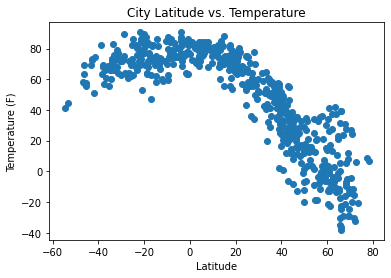

In [15]:
plt.scatter(weather_data['Lat'], weather_data['Temperature'])
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.title('City Latitude vs. Temperature')
plt.show()

#this scatter plot shows latitude versus temperature at a city. It shows that at the equater the temperatures are higher and the farther you get away from the equater (which is zero) the cooler temeratures are. 

## Latitude vs. Humidity Plot

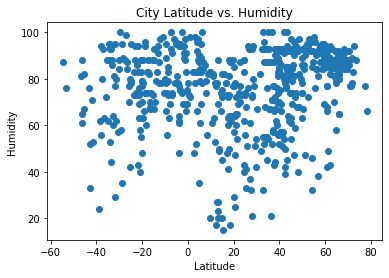

In [16]:
plt.scatter(weather_data['Lat'], weather_data['Humidity'])
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Humidity")
plt.show()

#this scatter plot shows latitude versus humidity. it shows that there is a wide range of humidity along all latitudes. 

## Latitude vs. Cloudiness Plot

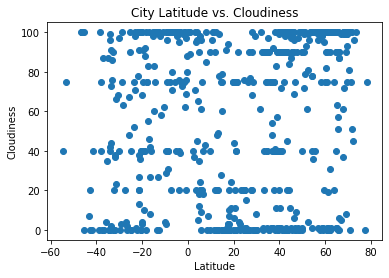

In [17]:
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'])
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Cloudiness")
plt.show()

#this is a scatter plot of latitude versus cloudiness. It seems to show that cloudiness seems to cluster along certain percentage points such as zero -- no clouds, 80 -- partly cloudy, and 100 -- very cloudy.  

## Latitude vs. Wind Speed Plot

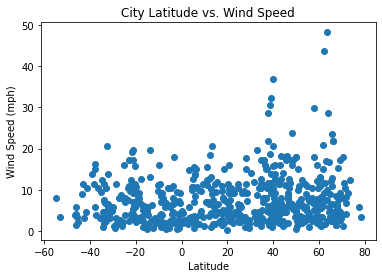

In [18]:
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'])
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Wind Speed")
plt.show()

#this is a scatter plot showing latitude versus wind speed. It shows that windspeeds vary across all latitudes. Generally the more common wind speeds are between zero and ten miles per hour. 

## Linear Regression

In [19]:
#read the csv to do the rest of the work
weather_file = "Output/cities.csv"
weather_data = pd.read_csv(weather_file)

In [20]:
#set up a dataframe for northern hemisphere
northern_hemisphere = weather_data[["City", "Lat", "Temperature", "Max Temp", "Humidity","Cloudiness",
                                    "Wind Speed"]].loc[(weather_data["Lat"] >= 0)]

#set up a dataframe for southern hemisphere
southern_hemisphere = weather_data[["City","Lat","Temperature", "Max Temp", "Humidity","Cloudiness",
                                    "Wind Speed"]].loc[(weather_data["Lat"] <= 0)]
Date = weather_data["Date"][0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7966533640618217


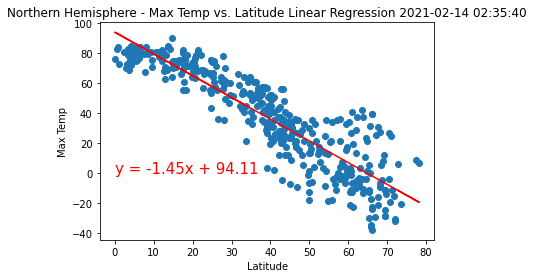

In [21]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0, 0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression {Date}")
print(f'The r-squared is: {rvalue**2}')

plt.savefig('northern_hemisphere_max_temp_vs_latitude_linereg.png')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.20483623960493547


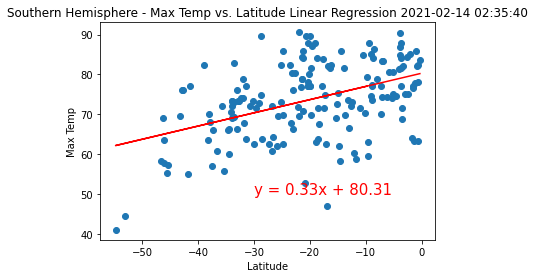

In [22]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30, 50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude Linear Regression {Date}")
print(f'The r-squared is: {rvalue**2}')


plt.savefig('southern_hemisphere_max_temp_vs_latitude_linereg.png')

plt.show()

#### Summary of correlation between maximum temperature and latitude 
These two graphs show a scatter plot with linear regression for both the northern and southern hemispheres of maximum temperatures. There is a higher correlation in the northern hemisphere between latitude and maximum temperature than in the southern hemisphere. There are many more outliers in the southern hemisphere meaning it would be harder to predict the temperatures based on latitude in the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09296265309185447


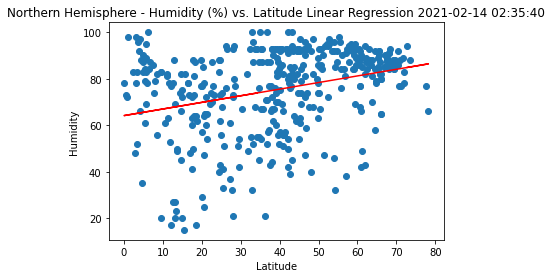

In [23]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40, 10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f"Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression {Date}")
print(f'The r-squared is: {rvalue**2}')

plt.savefig('northern_hemisphere_humid_vs_latitude_linereg.png')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.034546842744288916


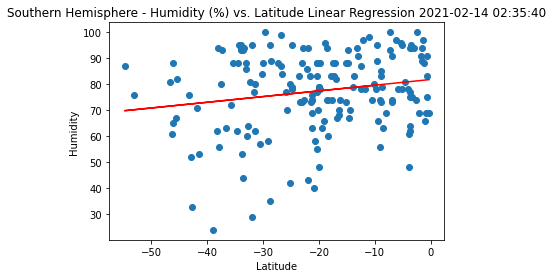

In [24]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25, 20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f"Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression {Date}")
print(f'The r-squared is: {rvalue**2}')

plt.savefig('southern_hemisphere_humid_vs_latitude_linereg.png')

plt.show()

#### Summary of correlation between humidity and latitude
These two graphs show a scatter plot with linear regression for both the northern and southern hemispheres of humidity. There correlation is similar in both hemispheres, with very little correlation between humidity and latitude. This would lead us to wonder if there are much more significant influences on humidity than where you are on the globe. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07116003421600824


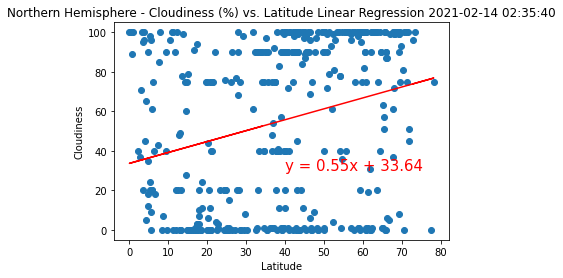

In [25]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40, 30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f"Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression {Date}")
print(f'The r-squared is: {rvalue**2}')

plt.savefig('northern_hemisphere_cloud_vs_latitude_linereg.png')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07650053874663995


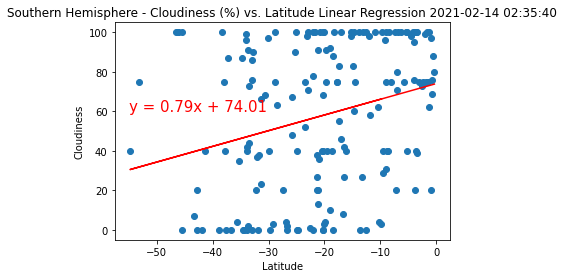

In [26]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f"Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression {Date}")
print(f'The r-squared is: {rvalue**2}')

plt.savefig('southern_hemisphere_cloud_vs_latitude_linereg.png')

plt.show()

#### Summary of correlation between cloudiness and latitude
These two graphs show a scatter plot with linear regression for both the northern and southern hemispheres of cloudiness. There correlation is similar in both hemispheres, with very little correlation between cloudiness and latitude. It looks from these charts that it could be cloudier in the northern hemisphere than in the southern hemisphere. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.010115650352216699


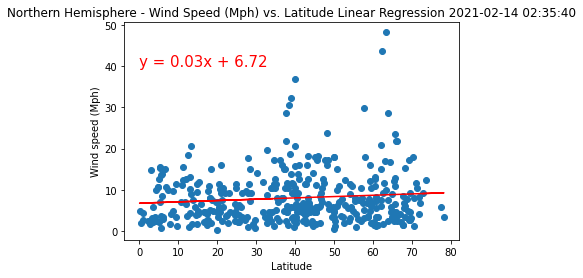

In [27]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0, 40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind speed (Mph)')
plt.title(f"Northern Hemisphere - Wind Speed (Mph) vs. Latitude Linear Regression {Date}")
print(f'The r-squared is: {rvalue**2}')

plt.savefig('northern_hemisphere_wind_vs_latitude_linereg.png')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.014004042619565372


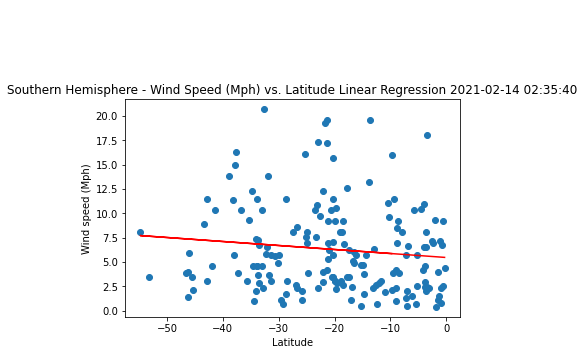

In [28]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25, 30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind speed (Mph)')
plt.title(f"Southern Hemisphere - Wind Speed (Mph) vs. Latitude Linear Regression {Date}")
print(f'The r-squared is: {rvalue**2}')

plt.savefig('southern_hemisphere_wind_vs_latitude_linereg.png')

plt.show()

#### Summary of correlation between wind speed and latitude
These two graphs show a scatter plot with linear regression for both the northern and southern hemispheres of wind speed. There correlation is very low for both hemispheres leading us to expect that as with cloudiness and humidity there must be more influences on what causes windiness than where you're at on the globe.